In [95]:
# Importing essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set (style='whitegrid')
import warnings 
warnings.filterwarnings('ignore')

In [96]:
# Loading the dataset from a CSV file into a DataFrame
df=pd.read_csv('mobile.csv')
df.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [97]:
# Retrieving the list of column names from the DataFrame
col=list(df.columns)
col

['brand',
 'model',
 'base_color',
 'processor',
 'screen_size',
 'ROM',
 'RAM',
 'display_size',
 'num_rear_camera',
 'num_front_camera',
 'battery_capacity',
 'ratings',
 'num_of_ratings',
 'sales_price',
 'discount_percent',
 'sales']

In [98]:
# Selecting relevant columns for analysis by slicing the column list
df=df[col[0:8]+col[10:14]+[col[-1]]]
#df[['brand','model','base_color','processor','screen_size','ROM','RAM','display_size',
#    'battery_capacity','ratings','num_of_ratings','sales_price','sales']]
df.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,battery_capacity,ratings,num_of_ratings,sales_price,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1800,4.5,38645,32999,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2815,4.5,244,57149,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1800,4.5,38645,32999,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,2942,4.6,5366,42999,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2815,4.6,745,69149,5.15


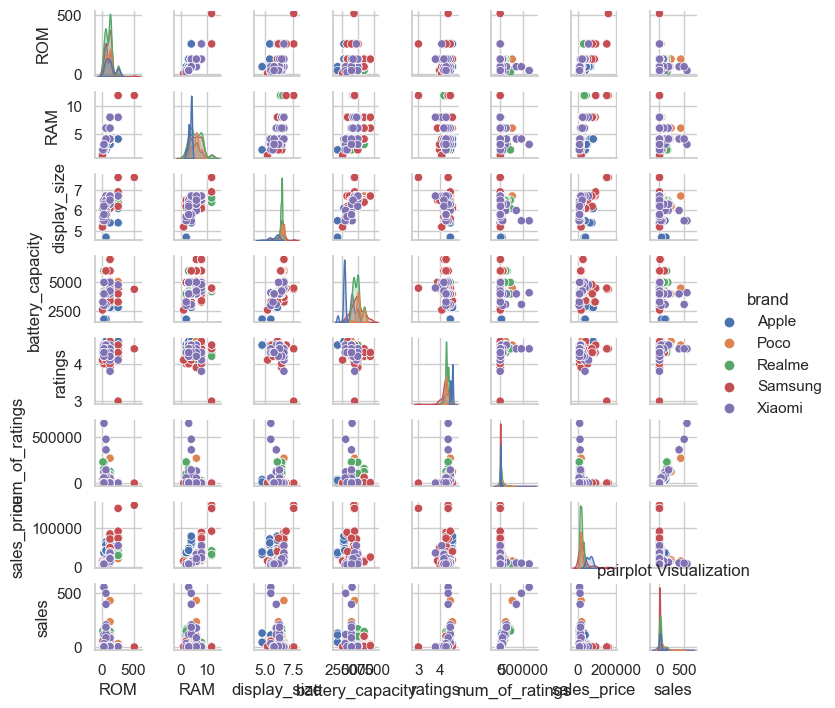

In [99]:
# Creating a compact pairplot grouped by 'brand' with reduced height for better screen fit
sns.pairplot(df,hue="brand",height=0.9)
plt.title("pairplot Visualization")
plt.show()

In [77]:
# Selecting relevant columns for heatmap
h=df[['ROM','RAM','display_size','battery_capacity','ratings','num_of_ratings','sales_price','sales']]
h.head()

,ROM,RAM,display_size,battery_capacity,ratings,num_of_ratings,sales_price,sales
0,64,2,4.7,1800,4.5,38645,32999,127.52
1,64,4,5.4,2815,4.5,244,57149,1.39
2,64,2,4.7,1800,4.5,38645,32999,127.52
3,64,3,6.1,2942,4.6,5366,42999,23.07
4,128,4,6.1,2815,4.6,745,69149,5.15


In [93]:
# Calculating the correlation matrix for selected features to understand the relationships between the variables like ROM, RAM, display size, etc.
# This helps in identifying patterns or strong correlations that may exist between the features.
m=h.corr()
m

,ROM,RAM,display_size,battery_capacity,ratings,num_of_ratings,sales_price,sales
ROM,1.000000,0.673320,0.217014,-0.112008,0.029243,-0.243288,0.653686,-0.219048
RAM,0.673320,1.000000,0.509706,0.198515,-0.213065,-0.215292,0.339269,-0.190557
display_size,0.217014,0.509706,1.000000,0.662044,-0.393010,-0.140491,-0.039588,-0.182469
battery_capacity,-0.112008,0.198515,0.662044,1.000000,-0.478756,0.019582,-0.485731,-0.030358
ratings,0.029243,-0.213065,-0.393010,-0.478756,1.000000,0.142089,0.209435,0.204377
num_of_ratings,-0.243288,-0.215292,-0.140491,0.019582,0.142089,1.000000,-0.240036,0.950485
sales_price,0.653686,0.339269,-0.039588,-0.485731,0.209435,-0.240036,1.000000,-0.221278
sales,-0.219048,-0.190557,-0.182469,-0.030358,0.204377,0.950485,-0.221278,1.000000


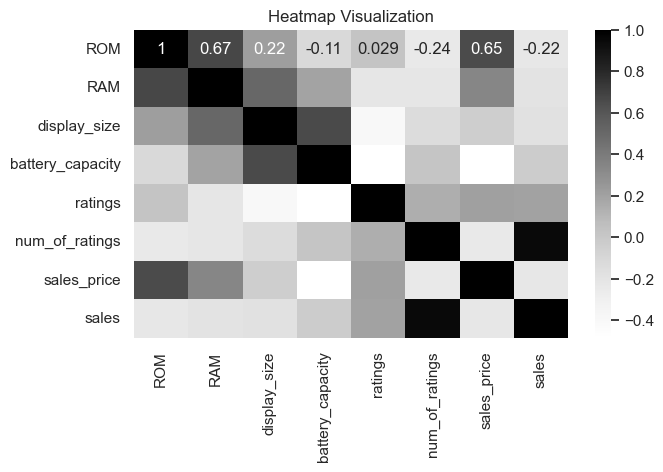

In [100]:
# Visualizing the correlation matrix using a heatmap to identify relationships between the variables. 
plt.figure(figsize=(7, 4))
sns.heatmap(m, annot=True, cmap="Greys")
plt.title("Heatmap Visualization")
plt.show()

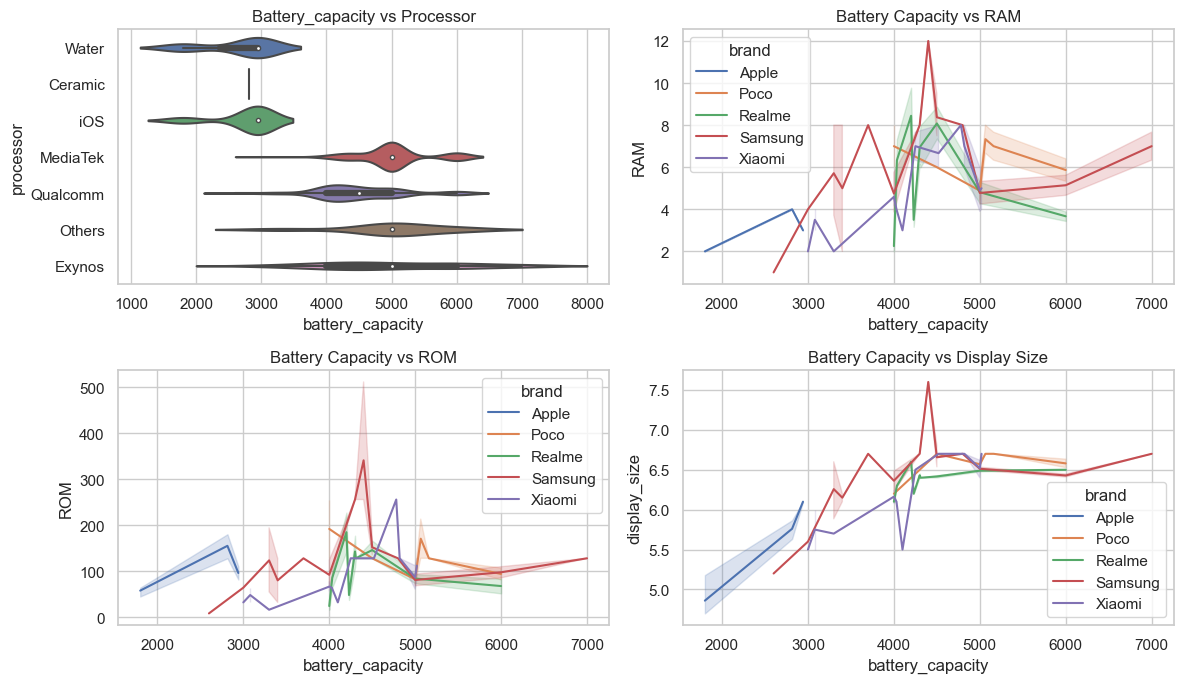

In [80]:
# Creating a 2x2 grid of subplots to visualize relationships between battery_capacity and other features.
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

sns.violinplot(x="battery_capacity", y="processor", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Battery_capacity vs Processor")

sns.lineplot(x='battery_capacity', y='RAM', hue='brand', data=df, ax=axes[0, 1])
axes[0, 1].set_title("Battery Capacity vs RAM")

sns.lineplot(x='battery_capacity', y='ROM', hue='brand', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Battery Capacity vs ROM")

sns.lineplot(x='battery_capacity', y='display_size', hue='brand', data=df, ax=axes[1, 1])
axes[1, 1].set_title("Battery Capacity vs Display Size")

plt.tight_layout()
plt.show()

In [101]:
# Grouping the dataset by 'brand' and aggregating sales data using sum, mean, and max functions.
gb=df.groupby('brand')['sales'].agg(['sum','mean','max']).reset_index()
gb

,brand,sum,mean,max
0,Apple,1091.27,19.486964,127.52
1,Poco,2437.32,43.523571,427.22
2,Realme,4301.91,31.173261,167.73
3,Samsung,1261.90,10.604202,98.89
4,Xiaomi,3701.10,60.673770,550.19


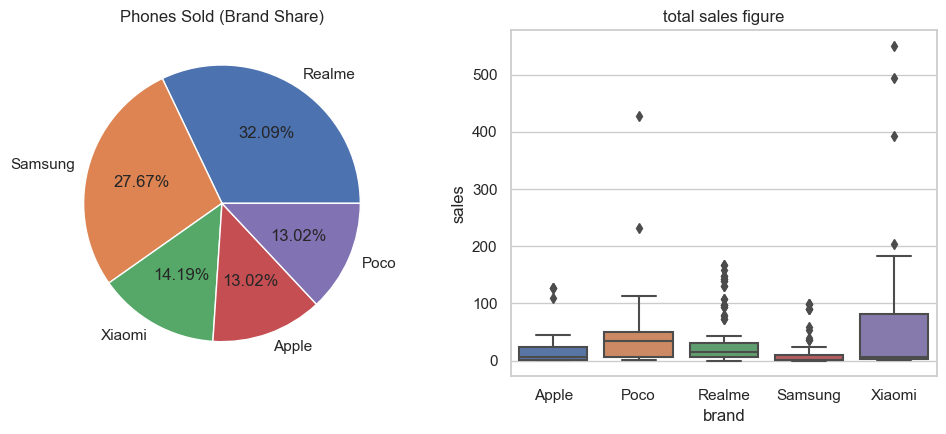

In [102]:
# Creating a 1x2 subplot layout with a pie chart on the left and a boxplot on the right
fig, axes = plt.subplots(1, 2, figsize=(10, 4.5))

n=df['brand'].value_counts().values
b=df['brand'].value_counts().index
axes[0].pie(n,labels=b,autopct='%0.02f%%')
axes[0].set_title("Phones Sold (Brand Share)")

sns.boxplot(x="brand",y="sales",data=df, ax=axes[1])
axes[1].set_title("total sales figure")

plt.tight_layout()
plt.show()

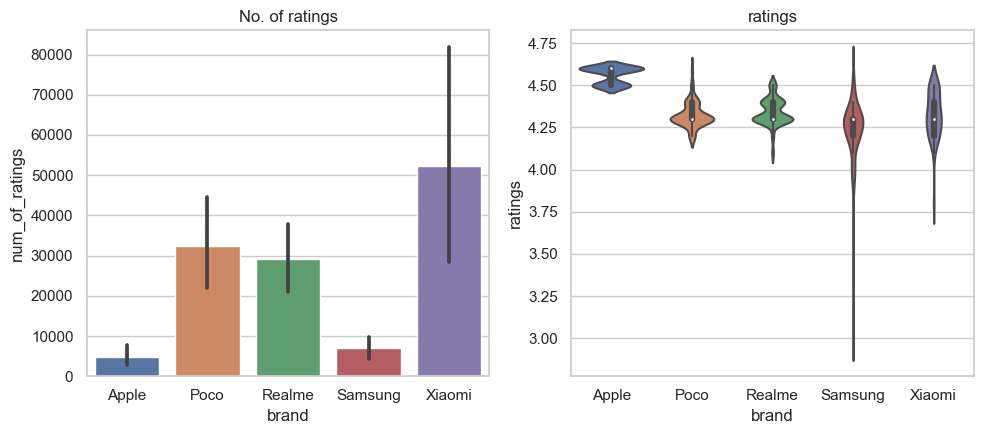

In [103]:
# Creating a 1x2 subplot layout with a bar plot on the left and a violin plot on the right
fig, axes = plt.subplots(1, 2, figsize=(10, 4.5))

sns.barplot(x='brand',y='num_of_ratings',data=df, ax=axes[0])
axes[0].set_title("No. of ratings")

sns.violinplot(x='brand',y='ratings',data=df, ax=axes[1])
axes[1].set_title("ratings")

plt.tight_layout()
plt.show()